## XAMS SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe

# center SiPMs
sipm = SiPM(type="plane",position=[0,4,z_plane],qeff=0.25)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[0,-4,z_plane],qeff=0.25)
geo.add_sipm(sipm)

# ring SiPMs
n_circ = 6
r = 17.5
for phi in np.linspace(0,2*np.pi,n_circ,endpoint=False):
    sipm = SiPM(type="plane",position=[r*np.cos(phi),r*np.sin(phi),z_plane],qeff=0.25)
    geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
n_mc = 5000
sims = []

for x in np.linspace(0,20,5,endpoint=True):
    for y in np.linspace(0,20,5,endpoint=True):
        print("simulate @ x= ",x," mm", "simulate @ y= ",y, "mm")
        sim = Simulator(geo=geo,uv_position=[x,y,0],n_mc=n_mc)
        sim.generate_events()
        sims.append(sim)

simulate @ x=  0.0  mm simulate @ y=  0.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 0. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00135  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00135  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00015  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00030  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00020  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00010  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00010  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00025  qe = 0.250
event generation done
simulate @ x=  0.0  mm simulate @ y=  5.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 5. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00220  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00065  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00015  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00045

Number of SiPMs =  8  Generated hits from x= [10. 15.  0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00045  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00020  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00025  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00140  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00030  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00015  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00005  qe = 0.250
event generation done
simulate @ x=  10.0  mm simulate @ y=  20.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [10. 20.  0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00015  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00015  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00010  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00145  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.0

### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [5]:
recs = []
for sim in sims:
    rec = Reconstruction(sim=sim)
    rec.emulate_events(n_uv=50000,n_event=1000,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
    recs.append(rec)

generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
                I       chi2       fval  status  xgen        xr  ygen  \
0    54661.231022  38.189409  13.572554     1.0   0.0  2.329981   0.0   
1    56635.825796  31.824137   5.309252     1.0   0.0  0.672031   0.0   
2    51985.182884  47.772329  24.349371     1.0   0.0  2.324773   0.0   
3    52383.794281  35.868195  11.800988     1.0   0.0  1.728797   0.0   
4    53651.191651  29.084631   5.591778     1.0   0.0  3.092695   0.0   
..            ...        ...        ...     ...   ...       ...   ...   
995  46461.219135  36.764827  14.993376     1.0   0.0  0.635226   0.0   
996  49236.986095  36.014981  12.898672     1.0   0.0  0.073812   0.0   
997  46734.718809  30.195470   8.880444     1.0   0.0  1.969219   0.0   
998  45681.062720  32.

generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
                I       chi2       fval  status  xgen        xr  ygen  \
0    52273.331351  31.876061  12.708503     1.0   5.0  5.756135   5.0   
1    58914.647502  36.087806  14.565458     1.0   5.0  6.011865   5.0   
2    52528.557480  34.845451  14.880616     1.0   5.0  5.641281   5.0   
3    49772.699661  37.145187  19.081785     1.0   5.0  5.962110   5.0   
4    54166.219657  42.103400  22.497636     1.0   5.0  5.541399   5.0   
..            ...        ...        ...     ...   ...       ...   ...   
995  69519.742973  44.557412  19.388265     1.0   5.0  5.852313   5.0   
996  58416.446919  48.333922  26.372381     1.0   5.0  5.033546   5.0   
997  50627.332479  37.953339  18.249046     1.0   5.0  5.241381   5.0   
998  55778.061797  39.208595  19.543971     1.0   5.0  6.702437   5.0   
999  62908.364083  38.348889  17.238910     1.0   5.0  7.50566

generated  700  events
generated  800  events
generated  900  events
reconstruction done
                I       chi2       fval  status  xgen        xr  ygen  \
0    47385.551323  27.110176  11.072631     1.0  10.0  6.618315  10.0   
1    43961.564554  35.882386  20.868979     1.0  10.0  4.952344  10.0   
2    42516.987231  22.722976   8.303868     1.0  10.0  5.620633  10.0   
3    41920.354035  19.083878   4.965121     1.0  10.0  3.446168  10.0   
4    46104.103355  34.931617  19.223151     1.0  10.0  6.545143  10.0   
..            ...        ...        ...     ...   ...       ...   ...   
995  51683.259189  25.209342   7.675143     1.0  10.0  6.962050  10.0   
996  53088.738880  26.080674   8.393750     1.0  10.0  5.257645  10.0   
997  47857.415075  24.307980   7.887024     1.0  10.0  4.973374  10.0   
998  45718.408194  20.037958   4.696619     1.0  10.0  5.625077  10.0   
999  42152.301582  22.571987   8.373948     1.0  10.0  7.244304  10.0   

            yr  
0    12.850844  


generated  800  events
generated  900  events
reconstruction done
                I       chi2       fval  status  xgen        xr  ygen  \
0    33216.153629  24.987591  13.750066     1.0  15.0  7.069004  15.0   
1    28403.250273  14.466079   5.387074     1.0  15.0  9.242536  15.0   
2    25995.958852  13.789878   5.385807     1.0  15.0  2.263769  15.0   
3    29004.974015  13.312487   3.442468     1.0  15.0  6.206992  15.0   
4    30772.722947  15.627250   5.101431     1.0  15.0  5.458846  15.0   
..            ...        ...        ...     ...   ...       ...   ...   
995  24399.622566  12.985795   4.624486     1.0  15.0  4.619038  15.0   
996  29973.905672  19.928126   9.812400     1.0  15.0  4.804228  15.0   
997  26289.133587  17.114785   8.746632     1.0  15.0  3.778419  15.0   
998  22755.532497  13.755058   5.991929     1.0  15.0  5.430689  15.0   
999  25839.143345  18.817631  10.252235     1.0  15.0  3.501390  15.0   

            yr  
0    10.799017  
1    10.059939  
2    1

/home/leonora/SiPM/SiPM.py:597: RuntimeWarning: divide by zero encountered in double_scalars
  lnlike = lnlike + res * res / nexpected
/home/leonora/SiPM/SiPM.py:597: RuntimeWarning: invalid value encountered in double_scalars
  lnlike = lnlike + res * res / nexpected


generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
                 I       chi2       fval  status  xgen         xr  ygen  \
0     72537.627350  24.966616  16.606377     1.0  20.0  21.248274  10.0   
1     43320.985183  16.516144   9.671179     1.0  20.0  18.704522  10.0   
2     51955.001420  17.262637   9.206483     1.0  20.0  18.753106  10.0   
3     49612.048192  19.990639  13.493559     1.0  20.0  21.450294  10.0   
4    122752.650739  25.933112  16.988781     1.0  20.0  25.784014  10.0   
..             ...        ...        ...     ...   ...        ...   ...   
995  212292.599351  48.926790  38.225270     1.0  20.0  27.473124  10.0   
996   71515.549528  22.385199  13.629895     1.0  20.0  21.470747  10.0   
997  203267.338420  36.378984  27.837149     1.0  20.0  30.050678  10.0   
998  182224.066507  39.077699  29.859306     1.0  20.0  26.931202  10.0   
999  159699.552093  28.274743  19.099123

# Plots from here ...... #

[0.03785602815419343, 0.027318894072643846, 0.055523741481017554, 0.0745275942085008, 0.09903939113590203, 0.10068992155954024, 0.03566270727263922, 0.03227487255606826, 0.13564563483414468, 0.12815455581573534, 0.03944040633415018, 0.050033572044937004, 0.05629803269626421, 0.11258920497663787, 0.07784785864873055, 0.05446031110540031, 0.08128534009631545, 0.1281277460647188, 0.0924280581326882, 0.35823542603988295, 0.09778215993438151, 0.11435292330284919, 0.18310558617461714, 0.20173173236630987, 0.23794974508570296]
[0.0, 5.0, 10.0, 15.0, 20.0, 5.0, 7.0710678118654755, 11.180339887498949, 15.811388300841896, 20.615528128088304, 10.0, 11.180339887498949, 14.142135623730951, 18.027756377319946, 22.360679774997898, 15.0, 15.811388300841896, 18.027756377319946, 21.213203435596427, 25.0, 20.0, 20.615528128088304, 22.360679774997898, 25.0, 28.284271247461902]


<ipython-input-56-34067dce09cb>:32: RuntimeWarning: invalid value encountered in double_scalars
  dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))
<ipython-input-56-34067dce09cb>:38: RuntimeWarning: divide by zero encountered in double_scalars
  srelx.append(df.xr.sem()/reco.sim.get_x0()[0])
<ipython-input-56-34067dce09cb>:39: RuntimeWarning: divide by zero encountered in double_scalars
  srely.append(df.yr.sem()/reco.sim.get_x0()[1])
<ipython-input-56-34067dce09cb>:32: RuntimeWarning: divide by zero encountered in double_scalars
  dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))


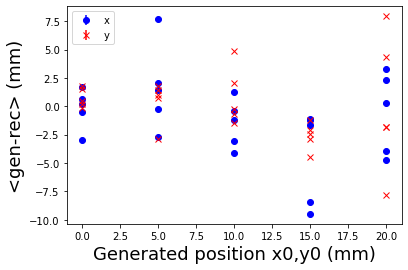

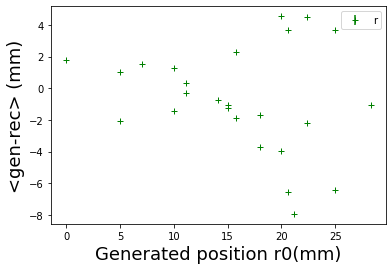

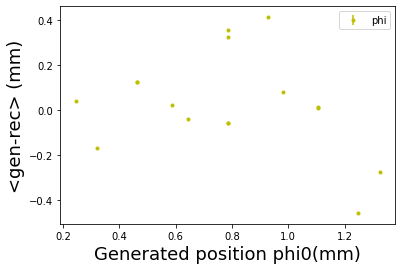

In [56]:
sx = []
sy = []
sr=[]
sphi=[]
srelx=[]
srely=[]
srelr=[]
srelphi =[]
x0 = []
y0 = []
r0 =[]
phi0 =[]
dx = []
dy = []
dr=[]
dphi=[]
dx_err = []
dy_err = []
dr_err = []
dphi_err = []


# loop through all the simulated locations
for reco in recs:
    df = reco.df_rec[reco.df_rec.status == 1]
    #print('xr =',df.xr.mean(),' yr =',df.yr.mean())
    dxtemp = df.xr.mean()-reco.sim.get_x0()[0]
    dytemp = df.yr.mean()-reco.sim.get_x0()[1]
    dx.append(dxtemp)
    dy.append(dytemp)
    dr.append((df.xr.mean()**2+df.yr.mean()**2)**0.5-(reco.sim.get_x0()[0]**2+reco.sim.get_x0()[1]**2)**0.5)
    dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))

    sx.append(df.xr.sem())
    sy.append(df.yr.sem())
    sr.append(((df.xr.sem())**2+(df.yr.sem())**2)**0.5)
    sphi.append(np.arctan(df.yr.sem()/df.xr.sem()))
    srelx.append(df.xr.sem()/reco.sim.get_x0()[0])
    srely.append(df.yr.sem()/reco.sim.get_x0()[1])
    srelr.append(((df.xr.sem())**2+(df.yr.sem())**2)**0.5/(dxtemp**2+dytemp**2)**0.5)
    srelphi.append(np.arctan(df.yr.sem()/df.xr.sem())/np.arctan(dytemp/dxtemp))
    x0temp = reco.sim.get_x0()[0]
    y0temp = reco.sim.get_x0()[1]
    x0.append(x0temp)
    y0.append(y0temp)
    r0.append(((reco.sim.get_x0()[0])**2+(reco.sim.get_x0()[1])**2)**0.5)
    if x0temp != 0 and y0temp != 0:
        phi0.append(np.arctan(y0temp/x0temp))
    else:
        phi0.append(np.nan)
        
print(sr)
print(r0)

# reconstruction resolution
dx_err = np.array(sx)/np.sqrt(50000)
dy_err = np.array(sy)/np.sqrt(50000)
dr_err = np.array(sr)/np.sqrt(50000)
dphi_err = np.array(sphi)/np.sqrt(50000)

"""
plt.plot(x0,sx,'bo')
plt.plot(x0,sy,'rx')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

plt.plot(r0,sr, 'g+')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.plot(phi0,sphi, 'y.')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['phi'])
plt.show()

#relative error
plt.plot(x0,srelx,'bo')
plt.plot(x0,srely,'rx')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('Relative $\sigma$ (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

plt.plot(r0,srelr, 'g+')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('Relative $\sigma$ (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.plot(phi0,srelphi, 'y.')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('Relative $\sigma$ (mm)',fontsize=18)
plt.legend(['phi'])
plt.show()
"""
# reconstruction bias
plt.errorbar(x0,dx,fmt='bo',yerr=dx_err)
plt.errorbar(y0,dy,fmt='rx',yerr=dy_err)
plt.xlabel('Generated position x0,y0 (mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

plt.errorbar(r0,dr,fmt='g+',yerr=dr_err)
plt.xlabel('Generated position r0(mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.errorbar(phi0,dphi,fmt='y.',yerr=dphi_err)
plt.xlabel('Generated position phi0(mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['phi'])
plt.show()

[0. 0. 0.]
<xr> =  1.7343427578057826  +/- 0.029191950223531677  mm
    rms_x =  0.9231305204862155  mm
<yr> =  0.44765446142494586  +/- 0.024102051982309185  mm
    rms_y =  0.7621738054787334  mm


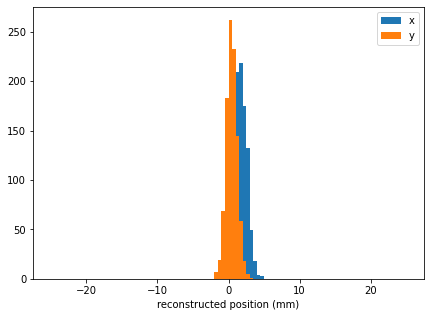

In [18]:
i=0

rec = recs[i]
print(rec.sim.get_x0())
recs[i].plot(type="res",bins=100,range=(-25,25))

[10.  0.  0.]


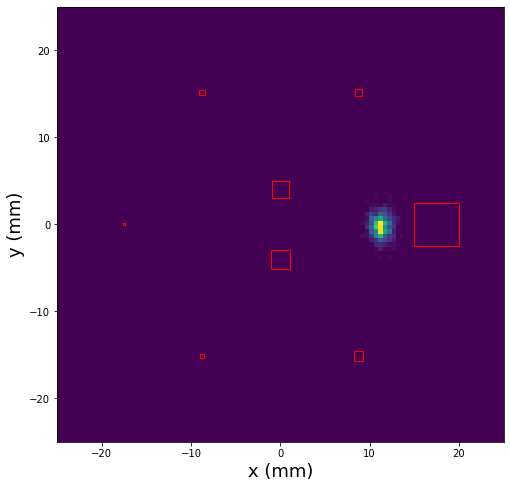

In [19]:
i=10
rec = recs[i]
print(rec.sim.get_x0())
ax = recs[i].plot(type="xy",range=((-25,25),(-25,25)))

 N(UV) reco =  51632.882564859494  +/- 141.6181823811538


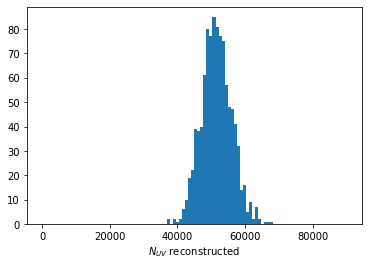

In [9]:
recs[i].plot(type="intensity",range=(0,90000))

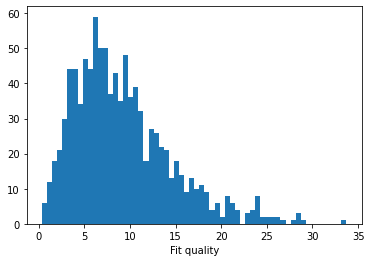

In [10]:
recs[i].plot(type="fit_quality",bins=60)

In [11]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [12]:
import scipy.stats as stats
# Plot the theoretical density of f
x = np.arange(0, 50, .05)
plt.plot(x, 350*stats.chi2.pdf(x, df=5), color='r', lw=2)
#h=plt.hist(df['chi2'],bins=50)
rec.plot(type="fit_quality",bins=60)
plt.xlim([0,30])

ModuleNotFoundError: No module named 'scipy'